In [1]:
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
import nltk

In [2]:
with open('login.json', 'r') as f:
    parameter = json.load(f)["details"]

In [3]:
auth = tweepy.OAuthHandler(parameter['API key'], parameter['API secret key'])
auth.set_access_token(parameter['Access Token'], parameter['Access Token Secret'],)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
my_qu = 'justiceforcarry'
max_value = 2000
searched_tweets = [t for t in tweepy.Cursor(api.search, q=my_qu).items(max_value)]

In [5]:
tweets = []
for i in searched_tweets:
    tweets.append(i._json)
with open('tweets.txt', 'w') as f:
        f.write(json.dumps(tweets, indent=4))

In [20]:
final_tweets = []
with open('tweets.txt', encoding='utf-8') as f:  
    data = json.load(f)
    for i in data:
        tweet_id = i['id']
        text_present = i['text']
        final_tweets.append({'tweet_id': str(tweet_id),
                             'text': str(text_present)
                            })
        
        dataset = pd.DataFrame(final_tweets, columns = 
                                  ['tweet_id', 'text'])
dataset.to_csv('data.csv')
df = pd.read_csv('data.csv')

In [21]:
df.head()

,Unnamed: 0,tweet_id,text
0,0,1266000433337602049,YOU DONT KNOW HOW THIS CAN BE A LARGE FACTOR T...
1,1,1265997011612033025,@pjimindipityy #BlackLivesMatter #justiceforcarry
2,2,1265996594794684417,RT @EnginerZindaHai: Sanitizer lga ke maar liy...
3,3,1265995963954417665,RT @Xiao_kws: Semua memiliki hak yg sama ❤\n#j...
4,4,1265995120639455232,RT @toxicansahab: Fuck you @YouTube @YouTubeTV...


In [22]:
def remove(txt, pattern):
    r = re.findall(pattern, txt)
    for c in r:
        txt = re.sub(c, '', txt)
    
    return txt
df['text'] = np.vectorize(remove)(df['text'], "@[\w]*")

In [23]:
df.head()

,Unnamed: 0,tweet_id,text
0,0,1266000433337602049,YOU DONT KNOW HOW THIS CAN BE A LARGE FACTOR T...
1,1,1265997011612033025,#BlackLivesMatter #justiceforcarry
2,2,1265996594794684417,RT : Sanitizer lga ke maar liya 😂😂\n#technical...
3,3,1265995963954417665,RT : Semua memiliki hak yg sama ❤\n#justicefor...
4,4,1265995120639455232,RT : Fuck you TV \nBeing carry video back. \...


In [25]:
df['tweets'] = 0
for i in range(0, 2000):
    tweet = re.sub('[^a-zA-Z0-9]', ' ', df['text'][i])
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    df['tweets'][i] = tweet

D:\ML_Workshop\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ML_Workshop\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
df.head()

,Unnamed: 0,tweet_id,text,tweets
0,0,1266000433337602049,YOU DONT KNOW HOW THIS CAN BE A LARGE FACTOR T...,you dont know how this can be a large factor t...
1,1,1265997011612033025,#BlackLivesMatter #justiceforcarry,blacklivesmatter justiceforcarry
2,2,1265996594794684417,RT : Sanitizer lga ke maar liya 😂😂\n#technical...,sanitizer lga ke maar liya technicalgur...
3,3,1265995963954417665,RT : Semua memiliki hak yg sama ❤\n#justicefor...,semua memiliki hak yg sama justiceforcar...
4,4,1265995120639455232,RT : Fuck you TV \nBeing carry video back. \...,fuck you tv being carry video back ca...


In [27]:
corpus_words = []
for i in range(0,2000):
    tweet = df['tweets'].iloc[i]
    tweet = nltk.word_tokenize(tweet)
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus_words.append(tweet)

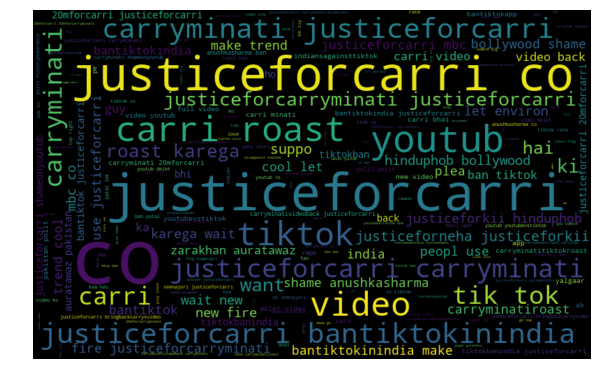

In [28]:
all = ' '.join([i for i in corpus_words])
cloud = WordCloud(width=800, height=500, random_state=0, max_font_size=110).generate(all)
plt.figure(figsize=(10, 7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('new.png')
plt.show()